In [2]:
## port 4
## Stock Market Analysis - visualization, risk analysis, predicting future stock prices by Monte Carlo method based on change in previous price

In [3]:
## baseline stock analysis - request stock information with pandas and analyze basic attributes of stock

In [4]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,8)

import seaborn as sns
sns.set_style('whitegrid')

from datetime import datetime
from IPython.display import SVG

In [5]:
# get tech stock data from yahoo finance
tickers = ['AAPL','GOOG','MSFT','AMZN','TSLA']

In [6]:
# Set End and Start datetime for getting stock data
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day) # using one-year range
start

datetime.datetime(2020, 1, 31, 0, 0)

In [6]:
# get yahoo finance data & save in dataframe
stock_df = {}

for stock in tickers:
    data = web.DataReader(stock,'yahoo',start,end)
    stock_df[stock]= pd.DataFrame(data)
    print(stock_df[stock])

                  High         Low        Open       Close       Volume  \
Date                                                                      
2020-01-28   79.599998   78.047501   78.150002   79.422501  162234000.0   
2020-01-29   81.962502   80.345001   81.112503   81.084999  216229200.0   
2020-01-30   81.022499   79.687500   80.135002   80.967499  126743200.0   
2020-01-31   80.669998   77.072502   80.232498   77.377502  199588400.0   
2020-02-03   78.372498   75.555000   76.074997   77.165001  173985600.0   
...                ...         ...         ...         ...          ...   
2021-01-22  139.850006  135.020004  136.279999  139.070007  113907200.0   
2021-01-25  145.089996  136.539993  143.070007  142.919998  157611700.0   
2021-01-26  144.300003  141.369995  143.600006  143.160004   98390600.0   
2021-01-27  144.300003  140.410004  143.429993  142.059998  140843800.0   
2021-01-28  141.990005  136.699997  139.520004  137.089996  141876400.0   

             Adj Close  

In [7]:
# Summary Statistics
stock_df['AAPL'].describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,100.622284,97.685492,99.140916,99.211978,1.562990e+08,98.954348
std,23.529944,23.006133,23.426088,23.255369,7.033976e+07,23.399097
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.744217
25%,79.825626,78.098751,78.830624,78.860003,1.065890e+08,78.542149
50%,99.248749,96.546249,98.127499,97.498749,1.375974e+08,97.155655
75%,119.782499,116.719997,118.632500,118.677502,1.870393e+08,118.677502
max,145.089996,141.369995,143.600006,143.160004,4.268848e+08,143.160004


In [8]:
stock_df['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2020-01-28 to 2021-01-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


<AxesSubplot:xlabel='Date'>

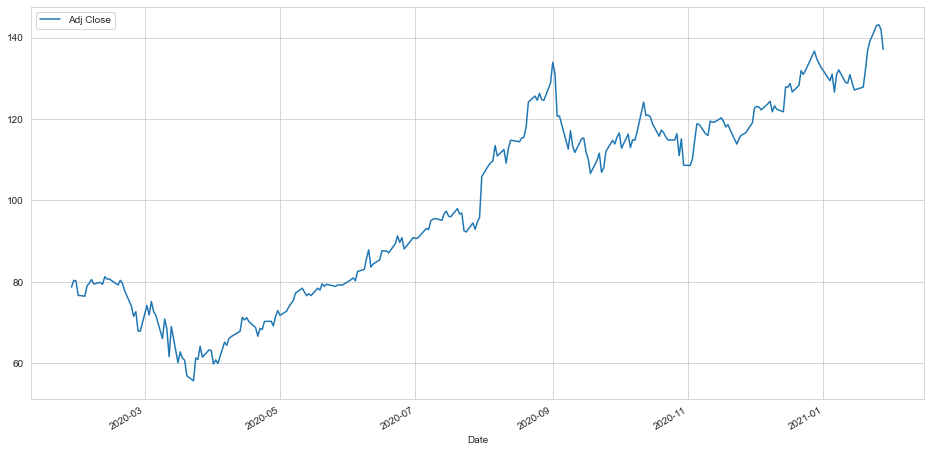

In [9]:
# Plot historical view of trend of closing price
stock_df['AAPL']['Adj Close'].plot(legend=True, figsize=(16,8))

In [75]:
# compute moving average/ rolling mean for the stock

ma_days = [10,20,50]

for ma in ma_days:
    col_name = "Moving Average for {ma} days".format(ma = ma)
    stock_df['AAPL'][col_name]=stock_df['AAPL']['Adj Close'].rolling(ma)

<AxesSubplot:xlabel='Date'>

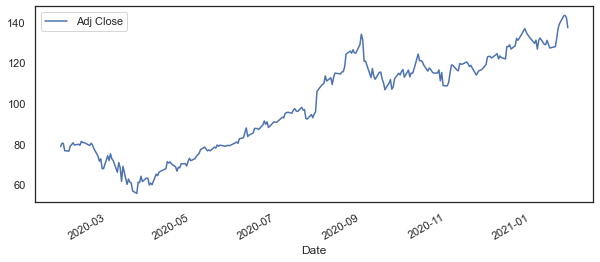

In [76]:
# plot moving average chart for AAPL

stock_df['AAPL'][['Adj Close','Moving Average for 10 days','Moving Average for 20 days','Moving Average for 50 days']].plot(subplots=False,figsize=(10,4))

In [12]:
stock_df['AAPL'].head()

,High,Low,Open,Close,Volume,Adj Close,Moving for 10 days,Moving for 20 days,Moving for 50 days
Date,,,,,,,,,
2020-01-28,79.599998,78.047501,78.150002,79.422501,162234000.0,78.742477,"Rolling [window=10,center=False,axis=0]","Rolling [window=20,center=False,axis=0]","Rolling [window=50,center=False,axis=0]"
2020-01-29,81.962502,80.345001,81.112503,81.084999,216229200.0,80.390747,"Rolling [window=10,center=False,axis=0]","Rolling [window=20,center=False,axis=0]","Rolling [window=50,center=False,axis=0]"
2020-01-30,81.022499,79.687500,80.135002,80.967499,126743200.0,80.274246,"Rolling [window=10,center=False,axis=0]","Rolling [window=20,center=False,axis=0]","Rolling [window=50,center=False,axis=0]"
2020-01-31,80.669998,77.072502,80.232498,77.377502,199588400.0,76.714989,"Rolling [window=10,center=False,axis=0]","Rolling [window=20,center=False,axis=0]","Rolling [window=50,center=False,axis=0]"
2020-02-03,78.372498,75.555000,76.074997,77.165001,173985600.0,76.504311,"Rolling [window=10,center=False,axis=0]","Rolling [window=20,center=False,axis=0]","Rolling [window=50,center=False,axis=0]"


<AxesSubplot:xlabel='Date'>

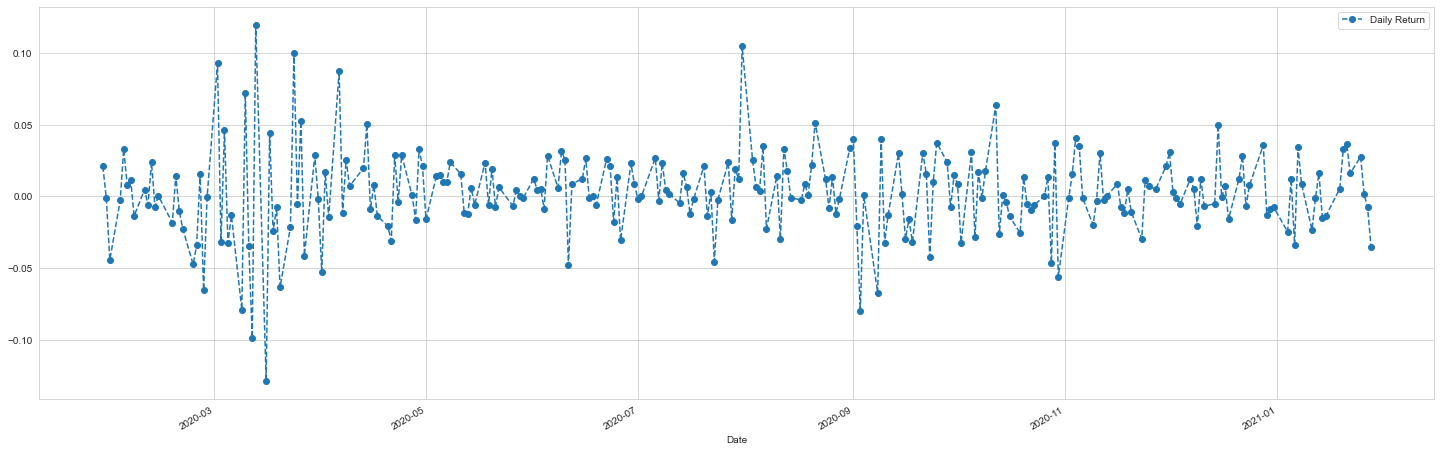

In [13]:
# Daily Return Line Plot (in terms of % change) for risk analysis 

stock_df['AAPL']['Daily Return'] = stock_df['AAPL']['Adj Close'].pct_change()
stock_df['AAPL']['Daily Return'].plot(figsize=(25,8),legend=True,linestyle='--',marker='o')

C:\Users\JC\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

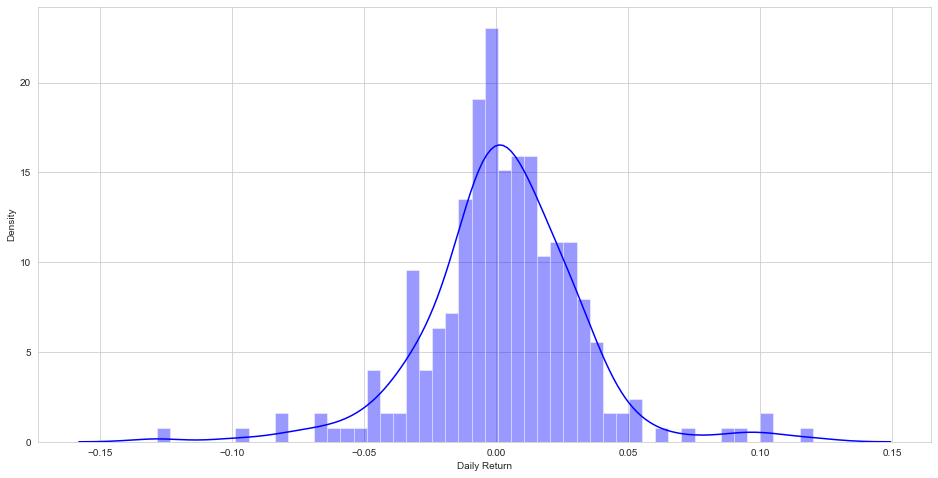

In [14]:
# Average Daily Return plot
# Histogram and kde plot on the same figure

sns.distplot(stock_df['AAPL']['Daily Return'].dropna(),bins=50,color='blue')

In [15]:
# Grab all the closing prices in stock list into DataFrame
# returns 'Adj Close' columns for each of the stocks in the same dataframe
closing_dict = {}

for stock in tickers:
    closing_dict[stock] = stock_df[stock]['Adj Close']
    
closing_df = pd.DataFrame(closing_dict) #By default the keys of the dict become the DataFrame columns
closing_df

,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2020-01-28,78.742477,1452.560059,163.725555,1853.250000,113.379997
2020-01-29,80.390747,1458.630005,166.278503,1858.000000,116.197998
2020-01-30,80.274246,1455.839966,170.968826,1870.680054,128.162003
2020-01-31,76.714989,1434.229980,168.445557,2008.719971,130.113998
2020-02-03,76.504311,1485.939941,172.552048,2004.199951,156.000000
...,...,...,...,...,...
2021-01-22,139.070007,1901.050049,225.949997,3292.229980,846.640015
2021-01-25,142.919998,1899.400024,229.529999,3294.000000,880.799988
2021-01-26,143.160004,1917.239990,232.330002,3326.129883,883.090027


In [16]:
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN','TSLA'],'yahoo',start,end)['Adj Close']
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Date,,,,,
2020-01-28,78.742477,1452.560059,163.725555,1853.250000,113.379997
2020-01-29,80.390747,1458.630005,166.278503,1858.000000,116.197998
2020-01-30,80.274246,1455.839966,170.968826,1870.680054,128.162003
2020-01-31,76.714989,1434.229980,168.445557,2008.719971,130.113998
2020-02-03,76.504311,1485.939941,172.552048,2004.199951,156.000000


In [17]:
# Get Daily Return (% change) for all the stocks

stock_return = closing_df.pct_change()

C:\Users\JC\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


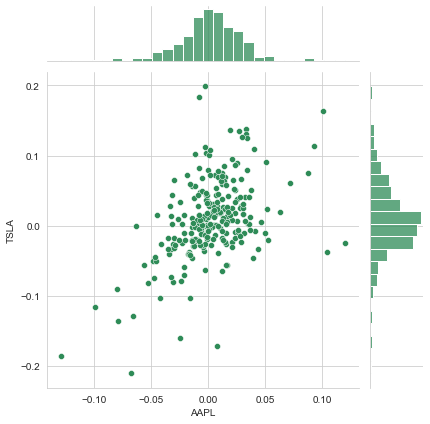

In [18]:
# Daily Percentage Return of stocks for correlation (joinplot of histogram + scatter plot)
sns.jointplot('AAPL','TSLA',stock_return, kind='scatter', color='seagreen')

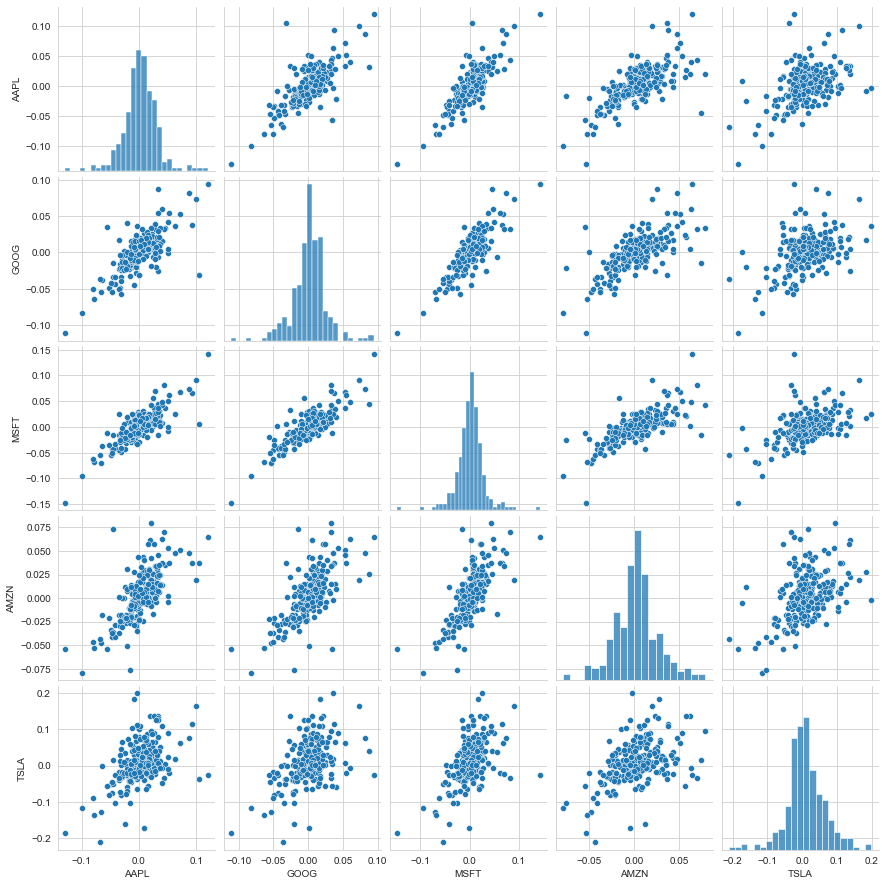

In [19]:
# comparison analysis for combination of stocks in ticker list

sns.pairplot(stock_return.dropna())

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

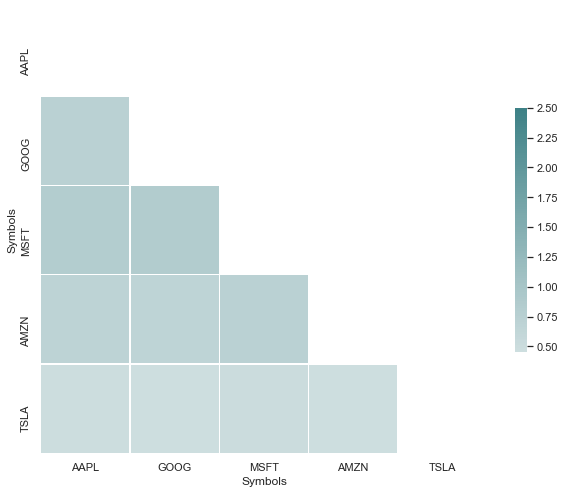

In [70]:
# Correlation plot of stocks' daily return values

sns.set_theme(style="white")

# Compute correlation matrix
corr = stock_return.dropna().corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 200, as_cmap=True)

# generate Correlation plot
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=2.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [92]:
stock_return.corr()
# MSFT and GOOG have the strongest correlation of daily stock return
# all tech stocks are positively correlated

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA
Symbols,,,,,
AAPL,1.000000,0.738671,0.829640,0.700141,0.476340
GOOG,0.738671,1.000000,0.847627,0.686263,0.450223
MSFT,0.829640,0.847627,1.000000,0.739166,0.502858
AMZN,0.700141,0.686263,0.739166,1.000000,0.456646
TSLA,0.476340,0.450223,0.502858,0.456646,1.000000


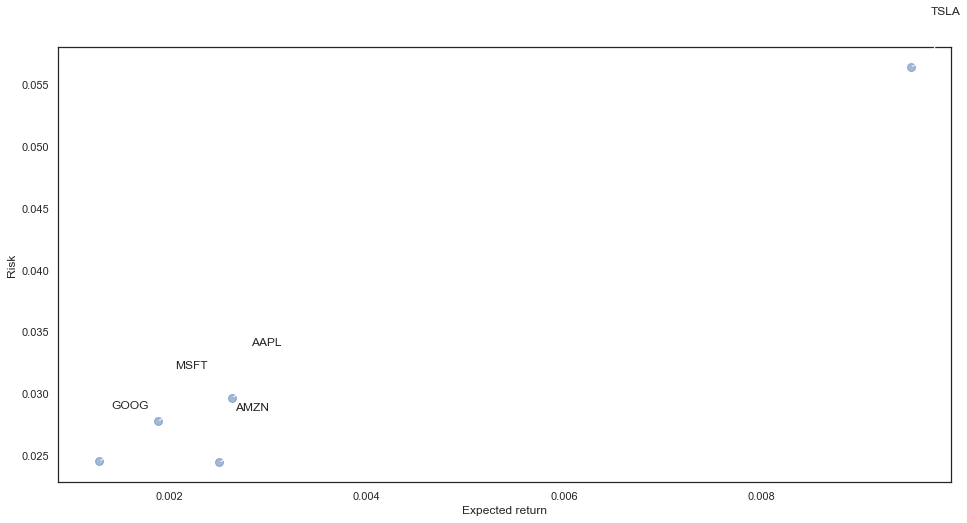

In [87]:
## Risk Analysis - risk of daily percentage returns is by comparing expected return with s.d. of daily returns

stock_return = stock_return.dropna()

area = np.pi*20

plt.scatter(stock_return.mean(), stock_return.std(),alpha = 0.5,s = area)

plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(stock_return.columns, stock_return.mean(), stock_return.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [ ]:
# Value at Risk - risk parameter for stocks
# treat value at risk as the amount of money we could expect to lose (aka putting at risk) for given confidence interval 
# use empirical quantiles from histogram of daily returns

C:\Users\JC\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AAPL', ylabel='Density'>

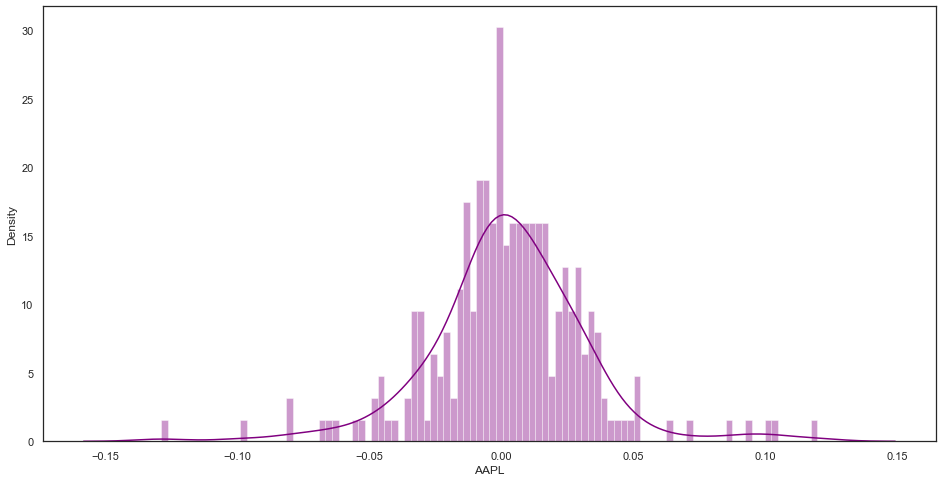

In [97]:
sns.distplot(stock_return['AAPL'],bins=100,color='purple')

In [ ]:
# The 5% empirical quantile of daily returns
stock_return['AAPL'].quantile(0.05)

In [110]:
# The 0.05 empirical quantile of daily returns is at 0.0448.
# with 95% confidence, worst daily loss will not exceed 4.48%
# with $1M investment, one-day 5% VaR (Value at Risk) is 0.0448 * 1,000,000

## monte carlo simulation

In [111]:
# Set up time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = stock_return.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = stock_return.std()['GOOG']

In [124]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

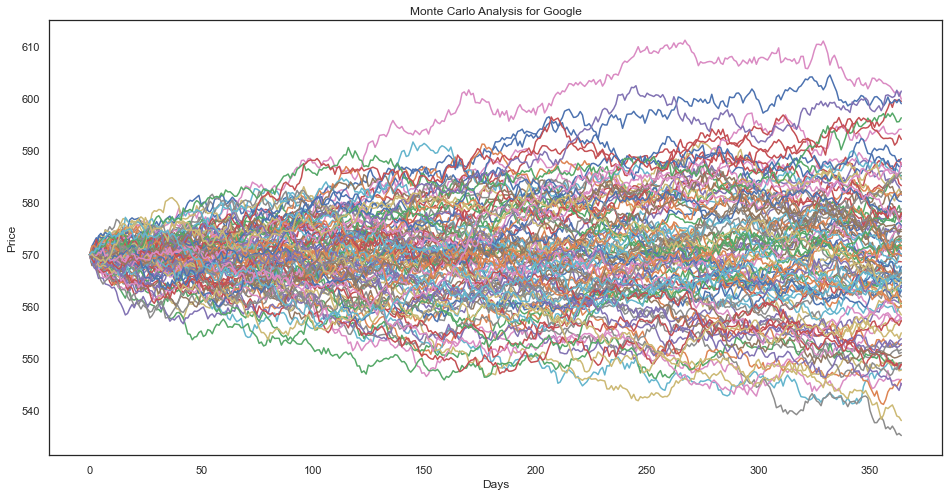

In [125]:
# Get start price from GOOG
start_price = 569.85

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [126]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

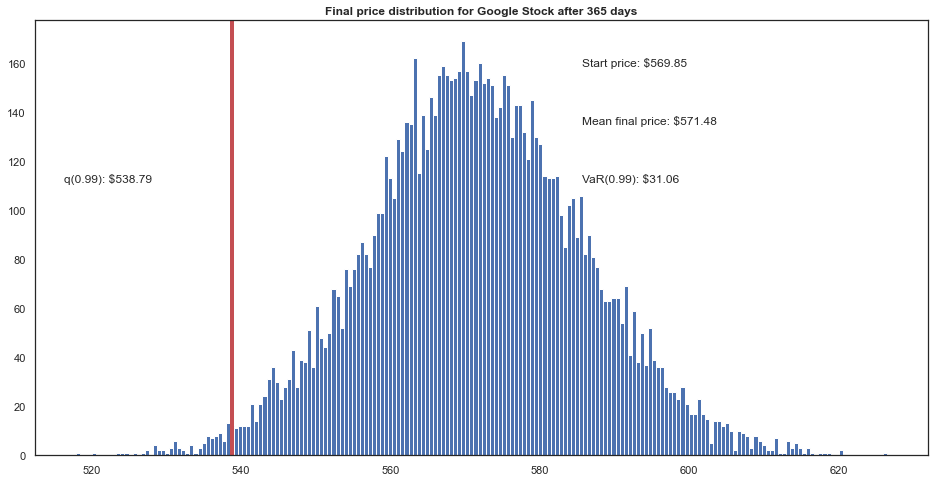

In [127]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [ ]:
# 1% empirical quantile of the final price distribution to estimate the Value at Risk (VaR) for GOOG stock,
# 99% of the time from our Monte Carlo Simulation
# risk = $31 for every investment which equal to the price of one inital google stock